Import Libraries, read file, and take a first look.

In [1]:
import numpy as np
import pandas as pd
import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('WHO Life Expectancy Data.csv')

In [3]:
data.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**Data Cleansing**

Wow this data set is not cut and dry. We have 2938 entries and variable with 0 - 652 null values! 

Some solid data cleaning is in order. We will be cleaning the data by either filling in the mean, like we do with 'Life Expectancy', or will be using other variables that stronly correlate. 

20 Quantitative and 2 Qualitative features. Obvious nul vallues.

First we will rename the variables.

In [34]:
data.rename(columns={" BMI ":"BMI","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"Thinness_1to19_years"," thinness 5-9 years":"Thinness_5to9_years",
                     "Income composition of resources":"Income_Comp_Of_Resources","Life expectancy ":"Life_Expectancy",
                   "Total expenditure":"Total_Exp"},inplace=True)

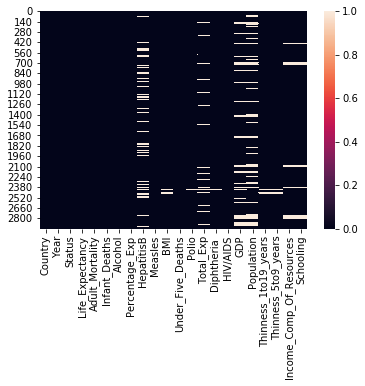

In [35]:
sns.heatmap(pd.isnull(data));

# This plot highlights the null values.

In [36]:
a = list(data.columns)
b = []
for i in a:
    c = data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a, 'no. of Nan' :b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life_Expectancy,0
4,Adult_Mortality,0
5,Infant_Deaths,0
6,Alcohol,0
7,Percentage_Exp,0
8,HepatitisB,553
9,Measles,0


We can see in columns like 'Life Expectancy' and 'Adult Mortality' there were few Nans values which wasn't visible in our heatmap. So lets fill them up with their average value as they are Continous features.

In [37]:
# This piece of code will fill the null values of the selected feature with its mean.

data['Life_Expectancy']=data['Life_Expectancy'].fillna(value=data['Life_Expectancy'].mean())

data['Adult_Mortality']=data['Adult_Mortality'].fillna(value=data['Adult_Mortality'].mean())

To fill in the other Nans lets look at finding a correlation that would help us create a model of best fit. 

In [38]:
corr_data=data.corr()
corr_data

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1to19_years,Thinness_5to9_years,Income_Comp_Of_Resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.039718,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life_Expectancy,0.169623,1.000000,-0.696359,-0.196535,0.409865,0.381791,0.255760,-0.157574,0.564466,-0.222503,0.464531,0.216373,0.478465,-0.556457,0.461393,-0.021548,-0.476561,-0.470977,0.724631,0.748263
Adult_Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.202326,-0.242814,-0.161828,0.031174,-0.384806,0.094135,-0.274218,-0.114355,-0.274540,0.523727,-0.296019,-0.013639,0.302501,0.308053,-0.457530,-0.452380
Infant_Deaths,-0.037415,-0.196535,0.078747,1.000000,-0.116933,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.039718,0.409865,-0.202326,-0.116933,1.000000,0.334648,0.093102,-0.052665,0.333476,-0.114155,0.224906,0.297398,0.225232,-0.052579,0.357064,-0.034583,-0.426957,-0.415972,0.453073,0.544576
Percentage_Exp,0.031400,0.381791,-0.242814,-0.085612,0.334648,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
HepatitisB,0.104333,0.255760,-0.161828,-0.223566,0.093102,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.052665,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.564466,-0.384806,-0.227279,0.333476,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
Under_Five_Deaths,-0.042937,-0.222503,0.094135,0.996629,-0.114155,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


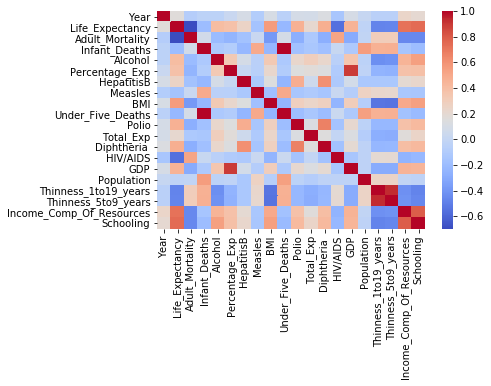

In [39]:
sns.heatmap(corr_data, cmap='coolwarm')

Alcohol's strongest correlation variable is Schooling with a value of 0.547378.

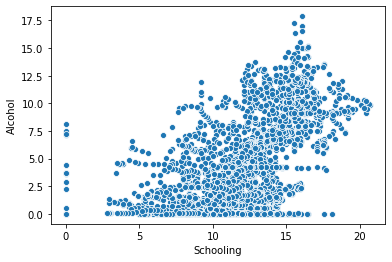

In [40]:
sns.scatterplot(x=data['Schooling'],y=data['Alcohol']);

#The semicolon atlast in the code is to hide the address of the plot which is not required but I personally like doing that

**Assistance** Am I calculating the mean that is including null values? I don't think so as I add in dropna() and nothing changes.

In [41]:
#Find the mean of 'Alcohol' for segments of 'Schooling'

school_filt1 = data.query('2.5 >= Schooling')
school_filt1['Alcohol'].mean()

3.5382142857142864

In [42]:
school_filt1 = data.query('2.5 >= Schooling')
school_filt1.dropna()
school_filt1['Alcohol'].mean()

3.5382142857142864

In [43]:
school_filt2 = data.query('2.5 < Schooling <= 5.0')
school_filt2['Alcohol'].mean()

1.5691379310344826

In [44]:
school_filt3 = data.query('5.0 < Schooling <= 7.5')
school_filt3['Alcohol'].mean()

1.333218390804598

In [45]:
school_filt4 = data.query('7.5 < Schooling <= 10')
school_filt4['Alcohol'].mean()

2.3826950354609897

In [46]:
school_filt5 = data.query('10 < Schooling <= 15')
school_filt5['Alcohol'].mean()

4.182420062695931

In [47]:
school_filt6 = data.query('15 < Schooling')
school_filt6['Alcohol'].mean()

9.011307847082495

In [48]:
# These values are mean values of the selected interval of other feature.

def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc <= 2.5:
            return 3.7
        elif 2.5 <sc<=5.0:
            return 1.6
        elif 5.0<sc<=7.5:
            return 1.4
        elif 7.5<sc<=10.0:
            return 2.4
        elif 10.0<sc<=15:
            return 4.2
        elif sc>15:
            return 9.1
    else:
        return al
    
data['Alcohol']=data[['Alcohol','Schooling']].apply(impute_Alcohol, axis=1)

In [49]:
a = list(data.columns)
b = []
for i in a:
    c = data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a, 'no. of Nan' :b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life_Expectancy,0
4,Adult_Mortality,0
5,Infant_Deaths,0
6,Alcohol,0
7,Percentage_Exp,0
8,HepatitisB,553
9,Measles,0


In [50]:
#sns.heatmap(pd.isnull(data));

In [51]:
data['Alcohol']=data['Alcohol'].fillna(value=data['Alcohol'].mean())

Look, no more null values in 'alcohol'.

In [52]:
#sns.distplot(data['Alcohol']);

The next null value to fill in is 'Hepatatis B' which highly correlates with 'Diptheria' at 0.61. Unfortanetyly they have null vallues in the same row, which means we will need to look at other correlations. 

'Diptheria' strongly correlates to 'Polio' at 0.67, but we are in the same problem, both have null values in the same zone. 

Have no fear as we can imput 'Polio' with 'Life excpectancy' which correlates at 0.46. We are entering into moderate correlation status between these two variables. If this model doesn't seem super acurate I would assume it is from this. 

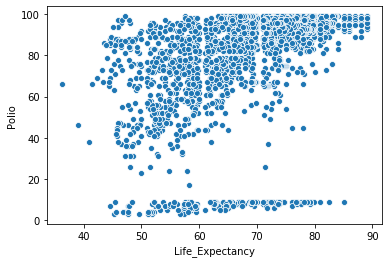

In [53]:
sns.scatterplot(x=data['Life_Expectancy'],y=data['Polio']);

I am using the mean of a segmented part of variables to add in the null values to get more accurate data, rather than just filling in the data with the overall mean. 

**Update** I started finding the mean of segmented features using quarries. Further on in my code I refined this process. 


In [54]:
data.rename(columns={"Life expectancy ":"Life_Expectancy"},inplace=True)

In [55]:
#Find the mean of 'Polio' for segments of 'Life expectancy'
Life_Expectancy_filt1 = data.query("50 >= Life_Expectancy")
Life_Expectancy_filt1['Polio'].mean()

61.688

In [56]:
Life_Expectancy_filt2 = data.query("50 < Life_Expectancy <= 60")
Life_Expectancy_filt2['Polio'].mean()

63.27850877192982

In [57]:
Life_Expectancy_filt3 = data.query("60 < Life_Expectancy <= 70")
Life_Expectancy_filt3['Polio'].mean()

79.62707182320442

In [58]:
Life_Expectancy_filt4 = data.query("70 < Life_Expectancy <= 80")
Life_Expectancy_filt4['Polio'].mean()

90.29390154298311

In [59]:
Life_Expectancy_filt5 = data.query("80 < Life_Expectancy")
Life_Expectancy_filt5['Polio'].mean()

94.300395256917

In [60]:
def impute_polio(c):
    p=c[0]
    l=c[1]
    if pd.isnull(p):
        if l<=50:
            return 61.7
        elif 50<l<=60:
            return 63.3
        elif 60<l<=70:
            return 79.6
        elif 70<l<=80:
            return 90.3
        elif l>80:
            return 94.3
    else:
        return p
    
data['Polio']=data[['Polio','Life_Expectancy']].apply(impute_polio,axis=1)

Let's see if the above code did what we wanted and replaced all the null values of 'Polio'

In [61]:
a = list(data.columns)
b = []
for i in a:
    c = data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a, 'no. of Nan' :b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life_Expectancy,0
4,Adult_Mortality,0
5,Infant_Deaths,0
6,Alcohol,0
7,Percentage_Exp,0
8,HepatitisB,553
9,Measles,0


Rock and roll, we got em. Next we will use our new filled in 'Polio' column to fill in 'Diphteria'

In [62]:
data.rename(columns={"Diphtheria ":"Diphtheria"},inplace=True)

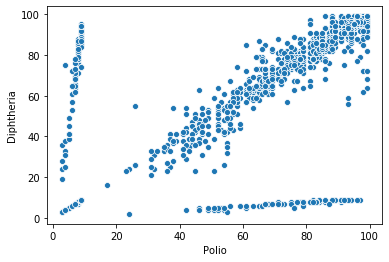

In [63]:
sns.scatterplot(x=data['Polio'],y=data['Diphtheria']);

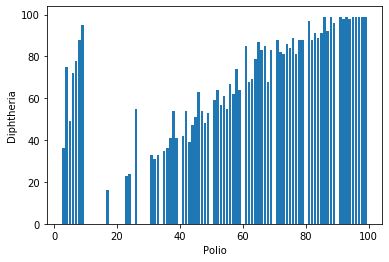

In [64]:
x = data['Polio']
y = data['Diphtheria']

plt.bar(x,y,align='center')
plt.xlabel('Polio')
plt.ylabel('Diphtheria')

plt.show()

**Data Assumption** I am amazed to see that there are places that have very few polio vaccines yet a huge amount of diphtheria vaccines. I would like to do more research on this. My guess is a relief group started focusing on improving diphtheria in places that orignally had zero vacancies, but didn't focus on polio.

In [65]:
#Find the mean of 'Diphtheria' from segments of 'Polio'
Polio_filt1 = data.query("20 >= Polio")
Polio_filt1['Diphtheria'].mean()

48.78034682080925

In [66]:
Polio_filt2 = data.query("20 < Polio <= 40")
Polio_filt2['Diphtheria'].mean()

31.517241379310345

In [67]:
Polio_filt3 = data.query("40 < Polio <= 60")
Polio_filt3['Diphtheria'].mean()

43.56172839506173

In [68]:
Polio_filt2 = data.query("60 < Polio <= 80")
Polio_filt2['Diphtheria'].mean()

67.07582938388626

In [69]:
Polio_filt2 = data.query("80 < Polio")
Polio_filt2['Diphtheria'].mean()

91.69620253164557

In [70]:
def impute_Diptheria(c):
    d=c[0]
    p=c[1]
    if pd.isnull(d):
        if p<=20:
            return 48.8
        elif 20<p<=40:
            return 31.5
        elif 40<p<=60:
            return 43.6
        elif 60<p<=80:
            return 67.1
        elif 80<p:
            return 91.7
    else:
        return d
data['Diphtheria']=data[['Diphtheria', 'Polio']].apply(impute_Diptheria, axis=1)

In [71]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life_Expectancy,0
4,Adult_Mortality,0
5,Infant_Deaths,0
6,Alcohol,0
7,Percentage_Exp,0
8,HepatitisB,553
9,Measles,0


Time has began to imput 'Hepatitis B' using 'Diptheria'. And in the meantime lets clean all our variable names at once. 

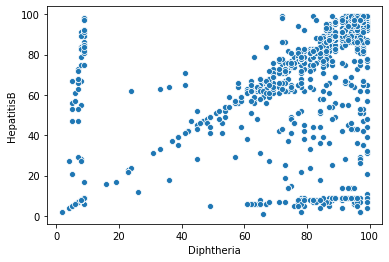

In [73]:
sns.scatterplot(x=data['Diphtheria'],y=data['HepatitisB']);

In [74]:
#Find the mean of 'HepatitsB' from segments of 'Diphtheria'
Diphtheria_filt1 = data.query("40 >= Diphtheria")
Diphtheria_filt1['HepatitisB'].mean()

36.093525179856115

In [75]:
Diphtheria_filt2 = data.query("40 < Diphtheria <= 50")
Diphtheria_filt2['HepatitisB'].mean()

44.827586206896555

In [76]:
Diphtheria_filt3 = data.query("50 < Diphtheria <= 60")
Diphtheria_filt3['HepatitisB'].mean()

53.0

In [77]:
Diphtheria_filt3 = data.query("60 < Diphtheria <= 70")
Diphtheria_filt3['HepatitisB'].mean()

57.92727272727273

In [78]:
Diphtheria_filt4 = data.query("70 < Diphtheria <= 80")
Diphtheria_filt4['HepatitisB'].mean()

66.34482758620689

In [79]:
Diphtheria_filt5 = data.query("80 < Diphtheria <= 90")
Diphtheria_filt5['HepatitisB'].mean()

78.84119106699752

In [80]:
Diphtheria_filt6 = data.query("90 < Diphtheria")
Diphtheria_filt6['HepatitisB'].mean()

91.0503448275862

In [81]:
def impute_HepatatisB(cols):
    hep=cols[0]
    dip=cols[1]
    if pd.isnull(hep):
        if dip<=40:
            return 36.1
        elif 40<dip<=50:
            return 44.8
        elif 50<dip<=60:
            return 53.0
        elif 60<dip<=70:
            return 57.9
        elif 70<dip<=80:
            return 66.3
        elif 80<dip<=90:
            return 78.8
        elif dip>90:
            return 91.1
    else:
        return hep
    
data['HepatitisB']=data[['HepatitisB','Diphtheria']].apply(impute_HepatatisB,axis=1)

In [82]:
data[data['Diphtheria']>80.0]['HepatitisB'].mean()

88.38033550792213

In [83]:
data[(data['Life_Expectancy']>80) & (data['Life_Expectancy']<=90)]['Schooling'].mean()

16.510504201680675

In [84]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df


,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life_Expectancy,0
4,Adult_Mortality,0
5,Infant_Deaths,0
6,Alcohol,0
7,Percentage_Exp,0
8,HepatitisB,0
9,Measles,0


##### Here is a list of the variables we will be correlating and imputing:

-Impute 'BMI' with 'Life_Expactancy'.

-Impute 'Total_Exp' with 'Alcohol'.

-Impute 'GDP' with 'Percentage_Exp'.

-Impute 'Population' with 'Infant_Deaths'.

-Impute 'Thinness_1to19_years' with 'BMI'.

-Impute 'Thinness_5to9_years' with 'BMI'.

-Impute 'Schooling' and 'Income_Comp_of_Resources' with 'Life_Expactancy'. 



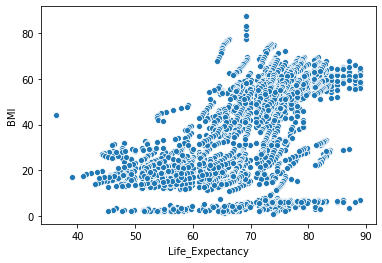

In [85]:
sns.scatterplot(x=data['Life_Expectancy'],y=data['BMI']);

Hey I learned how to filter my data and then run the mean. No more need for querries! 

In [86]:
data[data['Life_Expectancy']<=50.0]['BMI'].mean()

19.362400000000004

In [87]:
data[(data['Life_Expectancy']>50) & (data['Life_Expectancy']<=60)]['BMI'].mean()

19.12589285714285

In [88]:
data[(data['Life_Expectancy']>60) & (data['Life_Expectancy']<=70)]['BMI'].mean()

32.97172995780591

In [89]:
data[(data['Life_Expectancy']>70) & (data['Life_Expectancy']<=80)]['BMI'].mean()

46.81967812728601

In [90]:
data[data['Life_Expectancy']>80.0]['BMI'].mean()

50.79367588932805

In [91]:
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return 19.4
        elif 50<l<=60:
            return 19.1
        elif 60<l<=70:
            return 33
        elif 70<l<=80:
            return 46.8
        elif 80<l:
            return 50.8
    else:
        return b
    
data['BMI']=data[['BMI','Life_Expectancy']].apply(impute_BMI,axis=1)

In [92]:
data.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness_1to19_years',
       'Thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

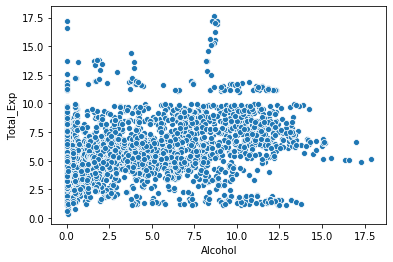

In [93]:
sns.scatterplot(y=data['Total_Exp'],x=data['Alcohol']);

In [94]:
data[data['Alcohol']<=2.5]['Total_Exp'].mean()

5.08741302408563

In [95]:
data[(data['Alcohol']>2.5) & (data['Alcohol']<=5)]['Total_Exp'].mean()

6.025063025210081

In [96]:
data[(data['Alcohol']>5) & (data['Alcohol']<=7.5)]['Total_Exp'].mean()

6.315833333333337

In [97]:
data[(data['Alcohol']>7.5) & (data['Alcohol']<=10)]['Total_Exp'].mean()

7.15888252148997

In [98]:
data[(data['Alcohol']>10) & (data['Alcohol']<=12.5)]['Total_Exp'].mean()

6.899100346020762

In [99]:
data[data['Alcohol']>12.5]['Total_Exp'].mean()

6.667777777777778

In [100]:
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return 5.09
        elif 2.5<a<=5.0:
            return 6.0
        elif 5.0<a<7.5:
            return 6.3
        elif 7.5<a<=10.0:
            return 7.2
        elif 10.0<a<=12.5:
            return 6.9
        elif a>12.5:
            return 6.7
    else:
        return t
    
data['Total_Exp']=data[['Total_Exp','Alcohol']].apply(impute_Total_exp,axis=1)    

In [101]:
data.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness_1to19_years',
       'Thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

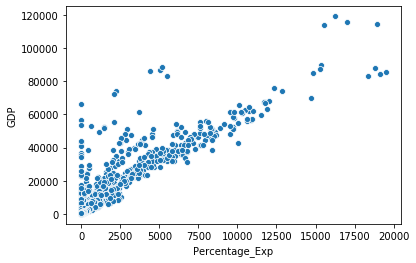

In [102]:
sns.scatterplot(x=data['Percentage_Exp'],y=data['GDP']);

In [103]:
data[data['Percentage_Exp']<=1250]['GDP'].mean()

2937.5602309464625

In [104]:
data[(data['Percentage_Exp']>1250) & (data['Percentage_Exp']<=2500)]['GDP'].mean()

18457.317701105694

In [105]:
data[(data['Percentage_Exp']>2500) & (data['Percentage_Exp']<=3750)]['GDP'].mean()

28719.604417377068

In [106]:
data[(data['Percentage_Exp']>3750) & (data['Percentage_Exp']<=7500)]['GDP'].mean()

39217.118505825245

In [107]:
data[(data['Percentage_Exp']>7500) & (data['Percentage_Exp']<=8750)]['GDP'].mean()

48372.835215384606

In [108]:
data[(data['Percentage_Exp']>8750) & (data['Percentage_Exp']<=10000)]['GDP'].mean()

54822.896244545445

In [109]:
data[(data['Percentage_Exp']>10000) & (data['Percentage_Exp']<=11250)]['GDP'].mean()

58842.19107307692

In [110]:
data[(data['Percentage_Exp']>11250) & (data['Percentage_Exp']<=12500)]['GDP'].mean()

67018.11323285714

In [111]:
data[(data['Percentage_Exp']>12500) & (data['Percentage_Exp']<=15000)]['GDP'].mean()

76305.27524666667

In [112]:
data[(data['Percentage_Exp']>15000) & (data['Percentage_Exp']<=17500)]['GDP'].mean()

105214.526792

In [113]:
data[data['Percentage_Exp']>17500]['GDP'].mean()

91186.030436

In [114]:
def impute_GDP(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=1250:
            return 2937.6
        elif 1250<p<=2500:
            return 18457.3
        elif 2500<p<=3750:
            return 28719.6
        elif 3750<p<=7500:
            return 39217.1
        elif 7500<p<=8750:
            return 48372.8
        elif 8750<p<=10000:
            return 54822.9
        elif 10000<p<=11250:
            return 58842.2
        elif 11250<p<=12500:
            return 67018.1
        elif 12500<p<=15000:
            return 76305.3
        elif 15000<p<=17500:
            return 105214.5
        elif p>17500:
            return 91186.0
    else:
        return g
    
data['GDP']=data[['GDP','Percentage_Exp']].apply(impute_GDP,axis=1)

In [115]:
data.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness_1to19_years',
       'Thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

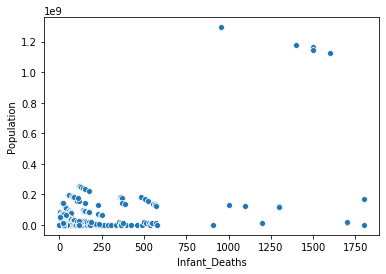

In [116]:
sns.scatterplot(x=data['Infant_Deaths'],y=data['Population']);

In [117]:
data[data['Infant_Deaths']<=100]['Population'].mean()

7695546.875260488

In [118]:
data[(data['Infant_Deaths']>100) & (data['Infant_Deaths']<=250)]['Population'].mean()

57794437.81355932

In [119]:
data[(data['Infant_Deaths']>250) & (data['Infant_Deaths']<=350)]['Population'].mean()

13841271.0

In [120]:
data[(data['Infant_Deaths']>350) & (data['Infant_Deaths']<=900)]['Population'].mean()

60540894.89189189

In [121]:
data[(data['Infant_Deaths']>900) & (data['Infant_Deaths']<=1100)]['Population'].mean()

334840080.0

In [122]:
data[(data['Infant_Deaths']>1100) & (data['Infant_Deaths']<=1250)]['Population'].mean()

12398691.0

In [123]:
data[(data['Infant_Deaths']>1250) & (data['Infant_Deaths']<=1500)]['Population'].mean()

745383892.0

In [124]:
data[(data['Infant_Deaths']>1500) & (data['Infant_Deaths']<=1750)]['Population'].mean()

385650245.6666667

In [125]:
data[data['Infant_Deaths']>1750]['Population'].mean()

86506883.5

In [126]:
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return 7695546.9
        elif 100<i<=250:
            return 57794437.8
        elif 250<i<=350:
            return 13841271.0
        elif 350<i<=900:
            return 60540894.9
        elif 900<i<=1100:
            return 334840080.0
        elif 1100<i<=1250:
            return 12398691.0
        elif 1250<i<=1500:
            return 745383892.0
        elif 1500<i<=1750:
            return 385650245.7
        elif i>1750:
            return 86506883.5
    else:
        return p
    
data['Population']=data[['Population','Infant_Deaths']].apply(impute_population,axis=1)

In [127]:
data.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness_1to19_years',
       'Thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

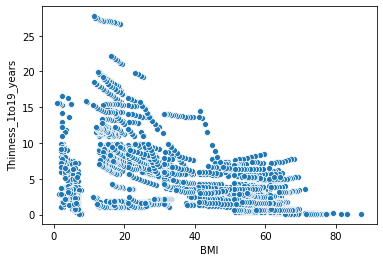

In [128]:
sns.scatterplot(x=data['BMI'],y=data['Thinness_1to19_years']);

In [129]:
data[data['BMI']<=10]['Thinness_1to19_years'].mean()

4.569964664310953

In [130]:
data[(data['BMI']>10) & (data['BMI']<=20)]['Thinness_1to19_years'].mean()

10.049180327868845

In [131]:
data[(data['BMI']>20) & (data['BMI']<=30)]['Thinness_1to19_years'].mean()

7.108641975308639

In [132]:
data[(data['BMI']>30) & (data['BMI']<=40)]['Thinness_1to19_years'].mean()

5.617000000000003

In [133]:
data[(data['BMI']>40) & (data['BMI']<=50)]['Thinness_1to19_years'].mean()

3.3408740359897147

In [134]:
data[(data['BMI']>50) & (data['BMI']<=70)]['Thinness_1to19_years'].mean()

2.306974637681159

In [135]:
data[data['BMI']>70]['Thinness_1to19_years'].mean()

0.23714285714285707

In [136]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 4.6
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 7.1
        elif 30<b<=40:
            return 5.6
        elif 40<b<=50:
            return 3.3
        elif 50<b<=70:
            return 2.3
        elif b>70:
            return 0.23
    else:
        return t
    
data['Thinness_1to19_years']=data[['Thinness_1to19_years','BMI']].apply(impute_Thin_1,axis=1)

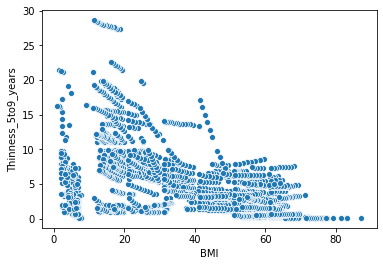

In [137]:
sns.scatterplot(x=data['BMI'],y=data['Thinness_5to9_years']);

In [138]:
data[data['BMI']<=10]['Thinness_5to9_years'].mean()

4.875618374558303

In [139]:
data[(data['BMI']>10) & (data['BMI']<=20)]['Thinness_5to9_years'].mean()

10.076639344262292

In [140]:
data[(data['BMI']>20) & (data['BMI']<=30)]['Thinness_5to9_years'].mean()

7.163950617283943

In [141]:
data[(data['BMI']>30) & (data['BMI']<=40)]['Thinness_5to9_years'].mean()

5.610500000000002

In [142]:
data[(data['BMI']>40) & (data['BMI']<=50)]['Thinness_5to9_years'].mean()

3.3750642673521796

In [143]:
data[(data['BMI']>50) & (data['BMI']<=70)]['Thinness_5to9_years'].mean()

2.266757246376818

In [144]:
data[data['BMI']>70]['Thinness_5to9_years'].mean()

0.20857142857142838

In [145]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 4.9
        elif 10<b<=20:
            return 10.1
        elif 20<b<=30:
            return 7.2
        elif 30<b<=40:
            return 5.6
        elif 40<b<=50:
            return 3.4
        elif 50<b<=70:
            return 2.3
        elif b>70:
            return 0.21
    else:
        return t
    
data['Thinness_5to9_years']=data[['Thinness_5to9_years','BMI']].apply(impute_Thin_1,axis=1)

In [146]:
data.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness_1to19_years',
       'Thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

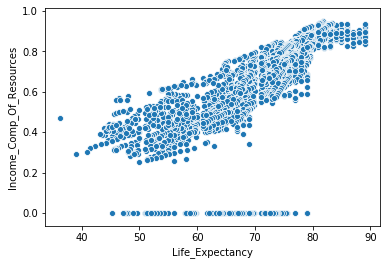

In [147]:
sns.scatterplot(x=data['Life_Expectancy'],y=data['Income_Comp_Of_Resources']);


In [148]:
data[data['Life_Expectancy']<=40]['Income_Comp_Of_Resources'].mean()

0.381

In [149]:
data[(data['Life_Expectancy']>40) & (data['Life_Expectancy']<=50)]['Income_Comp_Of_Resources'].mean()

0.3712434782608695

In [150]:
data[(data['Life_Expectancy']>50) & (data['Life_Expectancy']<=60)]['Income_Comp_Of_Resources'].mean()

0.40212048192771105

In [151]:
data[(data['Life_Expectancy']>60) & (data['Life_Expectancy']<=70)]['Income_Comp_Of_Resources'].mean()

0.5412112879884231

In [152]:
data[(data['Life_Expectancy']>70) & (data['Life_Expectancy']<=80)]['Income_Comp_Of_Resources'].mean()

0.7198969465648863

In [153]:
data[data['Life_Expectancy']>80]['Income_Comp_Of_Resources'].mean()

0.8889369747899157

In [154]:
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.38
        elif 40<l<=50:
            return 0.37
        elif 50<l<=60:
            return 0.40
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.72
        elif l>80:
            return 0.89
    else:
        return i
        
data['Income_Comp_Of_Resources']=data[['Income_Comp_Of_Resources','Life_Expectancy']].apply(impute_Income,axis=1) 

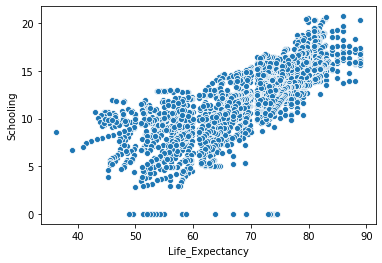

In [155]:
sns.scatterplot(x=data['Life_Expectancy'],y=data['Schooling']);

In [156]:
data[data['Life_Expectancy']<=40]['Schooling'].mean()

7.65

In [157]:
data[(data['Life_Expectancy']>40) & (data['Life_Expectancy']<=44)]['Schooling'].mean()

8.825

In [158]:
data[(data['Life_Expectancy']>44) & (data['Life_Expectancy']<=50)]['Schooling'].mean()

8.102803738317757

In [159]:
data[(data['Life_Expectancy']>50) & (data['Life_Expectancy']<=60)]['Schooling'].mean()

8.211807228915664

In [160]:
data[(data['Life_Expectancy']>60) & (data['Life_Expectancy']<=70)]['Schooling'].mean()

10.541582733812959

In [161]:
data[(data['Life_Expectancy']>70) & (data['Life_Expectancy']<=80)]['Schooling'].mean()

13.483435114503811

In [162]:
data[data['Life_Expectancy']>80]['Schooling'].mean()

16.510504201680675

In [163]:
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return 7.65
        elif 40<l<=44:
            return 8.3
        elif 44<l<50:
            return 8.1
        elif 50<l<=60:
            return 8.21
        elif 60<l<=70:
            return 10.54
        elif 70<l<=80:
            return 13.48
        elif l>80:
            return 16.51
    else:
        return s
    
data['Schooling']=data[['Schooling','Life_Expectancy']].apply(impute_schooling,axis=1)

In [243]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life_Expectancy,0
4,Adult_Mortality,0
5,Infant_Deaths,0
6,Alcohol,0
7,Percentage_Exp,0
8,HepatitisB,0
9,Measles,0


Damn thats beautiful. I am going to take a walk now. 

Back from the walk.

Since our target(y) variable is Life_Expectancy let's look at its distribution.

In [165]:
y=data['Life_Expectancy']

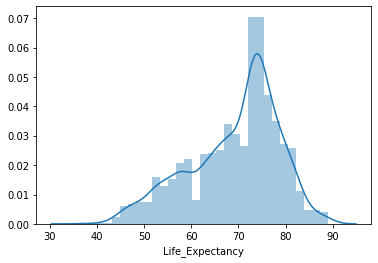

In [166]:
sns.distplot(y);

Almost normal distribution w/ negative skew. 

Naturally lets check out our X or Predictors dataset.

But first remove the second Total Expendecture column that got dublicated. 

In [184]:
X=data.drop('Life_Expectancy',axis=1)

In [242]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Columns: 409 entries, Year to Developing
dtypes: float64(15), int64(4), uint8(390)
memory usage: 1.5 MB


Two datatypes are objects. Look into these and then make them floats or ints. 

In [186]:
X['Country'].nunique()

193

In [187]:
X['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

Build dummy variables for the objects to fit the model. 

In [172]:
Country_Dummy=pd.get_dummies(x['Country'])

In [173]:
Status_dummy=pd.get_dummies(x['Status'])

Now that we have the variables, lets combine them with our x dataset. To make things less confusing we will drop the object variables and then concatenate. 

In [188]:
X.drop(['Country','Status'],inplace=True,axis=1)

In [189]:
X=pd.concat([x,Country_Dummy,Status_dummy],axis=1)

In [190]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Columns: 409 entries, Year to Developing
dtypes: float64(15), int64(4), uint8(390)
memory usage: 1.5 MB


In [191]:
X.head()

,Year,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developed,Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,0,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,0,0,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,0,0,0,0,1


**Machine Learning** portion

We will be using Linear Regression. First spliting the model 30% for testing and 70% for training the model. 

In [181]:
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.30, random_state=101)

In [195]:
from sklearn.linear_model import LinearRegression

In [196]:
Linear_model= LinearRegression()

In [198]:
Linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [199]:
LRpredictions1=Linear_model.predict(X_test)

In [200]:
LRpredictions1[0:10]

array([53.03585939, 54.3826393 , 83.55675712, 63.41162808, 73.59482563,
       72.45365188, 69.21741222, 80.39253979, 60.74887643, 82.95432614])

The above values of 'Life_Expectancy' seem within reason. Lest use Root Mean Square Error to get more information on our model, as well as, the R square value.

In [201]:
from sklearn.metrics import mean_squared_error

In [203]:
print(mean_squared_error(y_test,LRpredictions1)**(0.5))

1.9132493350027333


In [205]:
from sklearn.metrics import r2_score

In [206]:
r2_score(y_test,LRpredictions1)

0.9577021921489743

We have a beautiful predictive model. Neat. 

This is what I want to answer next:

What variables correlate strongest with 'Life_Expectancy'? 

In [222]:
data.corr()['Life_Expectancy'][:].sort_values(ascending=True)

Adult_Mortality            -0.696359
HIV/AIDS                   -0.556457
Thinness_1to19_years       -0.482628
Thinness_5to9_years        -0.477051
Under_Five_Deaths          -0.222503
Infant_Deaths              -0.196535
Measles                    -0.157574
Population                 -0.033168
Year                        0.169623
Total_Exp                   0.220730
Percentage_Exp              0.381791
HepatitisB                  0.383386
Alcohol                     0.409865
GDP                         0.431653
Polio                       0.467146
Diphtheria                  0.479904
BMI                         0.568145
Income_Comp_Of_Resources    0.734801
Schooling                   0.757592
Life_Expectancy             1.000000
Name: Life_Expectancy, dtype: float64

The two top indicators of a higher 'Life_Expectancy': 
'Schooling' & 'Income_Comp_of_Resources

The feature most negatively affecting 'Life_Expectancy' is Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

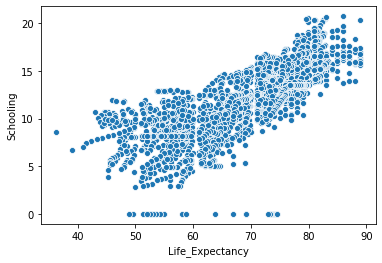

In [239]:
sns.scatterplot(x=data['Life_Expectancy'],y=data['Schooling']);

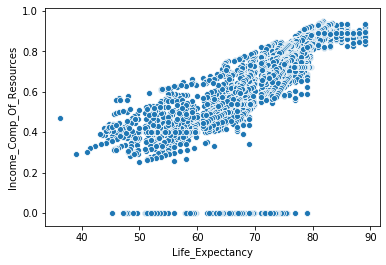

In [241]:
sns.scatterplot(x=data['Life_Expectancy'],y=data['Income_Comp_Of_Resources']);

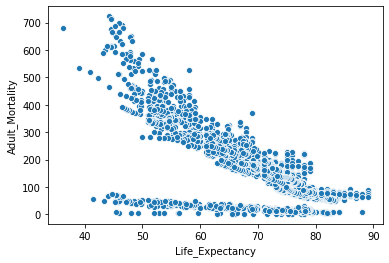

In [244]:
sns.scatterplot(x=data['Life_Expectancy'],y=data['Adult_Mortality']);

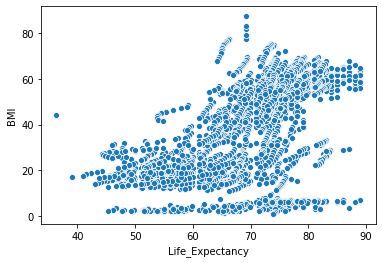

In [246]:
sns.scatterplot(x=data['Life_Expectancy'],y=data['BMI']);

In [249]:
data['Life_Expectancy'].describe()

count    2938.000000
mean       69.224932
std         9.507640
min        36.300000
25%        63.200000
50%        72.000000
75%        75.600000
max        89.000000
Name: Life_Expectancy, dtype: float64

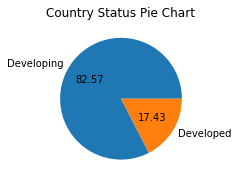

In [260]:
plt.subplot(122)
data.Status.value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Country Status Pie Chart')

plt.show()

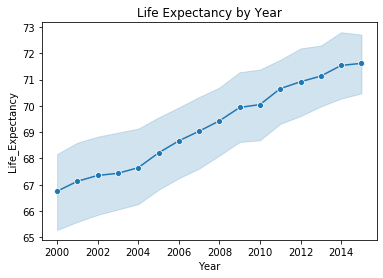

In [263]:
sns.lineplot('Year', 'Life_Expectancy', data=data, marker='o')
plt.title('Life Expectancy by Year')
plt.show()

In [264]:
data.groupby('Status').Life_Expectancy.agg(['mean'])

,mean
Status,
Developed,79.197852
Developing,67.120177


In [266]:
data_cols = list(data.columns)
interested_vars = [data_cols[2]]
for col in data_cols[4:]:
    interested_vars.append(col)

In [267]:
data[interested_vars].groupby('Status').agg('mean')

,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1to19_years,Thinness_5to9_years,Income_Comp_Of_Resources,Schooling
Status,,,,,,,,,,,,,,,,,,
Developed,79.685547,1.494141,9.712055,2703.600380,88.297461,499.005859,51.803906,1.810547,93.736328,7.506699,93.476562,0.100000,19663.913140,6.992333e+06,1.320703,1.296680,0.842393,15.665137
Developing,182.758848,36.384171,3.540611,323.470285,76.841261,2824.926216,35.281121,50.525144,80.104081,5.614324,79.911995,2.088664,4073.036216,1.302292e+07,5.631121,5.673702,0.578874,11.166134
